### Steps

1. load data
2. build model
3. train model
4. evaluate model
5. make prediction -> a liitle tricky (need to pay attention to shapes)


#### load data
linear regression excepts a 2D array as input we passed it with an N\*T array however RNN excepts 3D input (N\*T\*1 in this sample)

In [1]:
# instantiate the model
from keras.layers import SimpleRNN, Input, Dense
from keras.models import Model
from keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt

Using plaidml.keras.backend backend.


In [2]:
# load data
series = np.sin(np.arange(0, 20, 0.1)) + np.random.randn(200) * 0.1

# build dataset

T = 10 # sequence length
D = 1 # number of input features

X = []
Y = []
for t in range(len(series) - T):
    X.append(series[t:t+T])
    Y.append(series[t+T])
X = np.array(X).reshape(-1, T, 1)
Y = np.array(Y)
N = len(X) # number of samples

In [3]:
# build model

# things to test => change activation to None and relu and no activation
#                   add noise to the dataset
input1 = Input((T, 1))
x = SimpleRNN(5, activation='relu')(input1)
x = Dense(1)(x)

model = Model(input1, x)
model.compile(Adam(lr=0.1), loss='mse')

INFO:plaidml:Opening device "metal_amd_radeon_pro_555x.0"


In [4]:
model.fit(X[:-N//2], Y[:-N//2], validation_data=(X[-N//2:], Y[-N//2:]), epochs=80)

Train on 95 samples, validate on 95 samples
Epoch 1/80
95/95 [==============================] - 0s 5ms/step - loss: 0.3768 - val_loss: 0.1523
Epoch 2/80
95/95 [==============================] - 0s 444us/step - loss: 0.1266 - val_loss: 0.0566
Epoch 3/80
95/95 [==============================] - 0s 447us/step - loss: 0.0491 - val_loss: 0.0441
Epoch 4/80
95/95 [==============================] - 0s 346us/step - loss: 0.0491 - val_loss: 0.0606
Epoch 5/80
95/95 [==============================] - 0s 346us/step - loss: 0.0602 - val_loss: 0.0607
Epoch 6/80
95/95 [==============================] - 0s 333us/step - loss: 0.0435 - val_loss: 0.0338
Epoch 7/80
95/95 [==============================] - 0s 338us/step - loss: 0.0352 - val_loss: 0.0352
Epoch 8/80
95/95 [==============================] - 0s 360us/step - loss: 0.0373 - val_loss: 0.0426
Epoch 9/80
95/95 [==============================] - 0s 365us/step - loss: 0.0342 - val_loss: 0.0298
Epoch 10/80
95/95 [==============================] - 0s 33

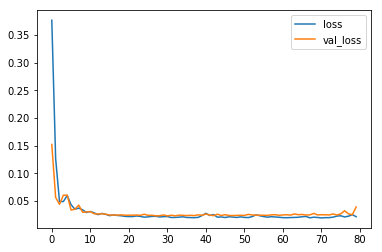

In [5]:
r = model.history
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

In [6]:
validation_target = Y[-N//2:]
validation_predict = []
last_x = X[-N//2]


In [7]:
while len(validation_predict) <  len(validation_target):
    predict = model.predict(last_x.reshape(1, T, 1))[0, 0]
    validation_predict.append(predict)
    last_x = np.roll(last_x, -1)
    last_x[-1] = predict

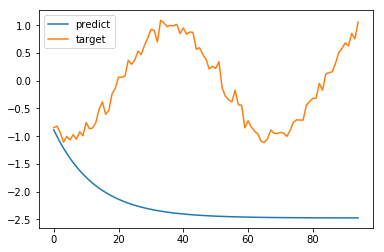

In [8]:
plt.plot(validation_predict, label='predict')
plt.plot(validation_target, label='target')
plt.legend()